In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [16]:
!kaggle datasets download -d pardeep19singh/icc-mens-world-cup-2023

icc-mens-world-cup-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile
import pandas as pd

zip_file_path = '/content/icc-mens-world-cup-2023.zip'
extracted_folder = '/content/Cricket/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

deliveries = pd.read_csv(extracted_folder+'deliveries.csv')
matches = pd.read_csv(extracted_folder+'matches.csv')
points_table = pd.read_csv(extracted_folder+'points_table.csv')

In [21]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
deliveries.shape

(17380, 22)

In [42]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [22]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [23]:
matches.shape

(32, 18)

In [24]:
points_table.head()

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,Series Form,Next Match,For,Against
0,1,South Africa,7,6,1,0,0,12,2.290,LWWWW,"vs IND, AFG",2355/340.2,1588/343.0
1,2,India,6,6,0,0,0,12,1.405,WWWWW,"vs SL, SA, NED",1430/246.2,1320/300.0
2,3,Australia,6,4,2,0,0,8,0.970,LWWWW,"vs ENG, AFG, BAN",1745/285.2,1499/291.2
3,4,New Zealand,7,4,3,0,0,8,0.484,WWLLL,"vs PAK, SL",1964/329.1,1908/348.0
4,5,Pakistan,7,3,4,0,0,6,-0.024,LLLLW,"vs NZ, ENG",1884/330.5,1869/326.5


In [25]:
points_table.shape

(10, 13)

<Figure size 1200x600 with 0 Axes>

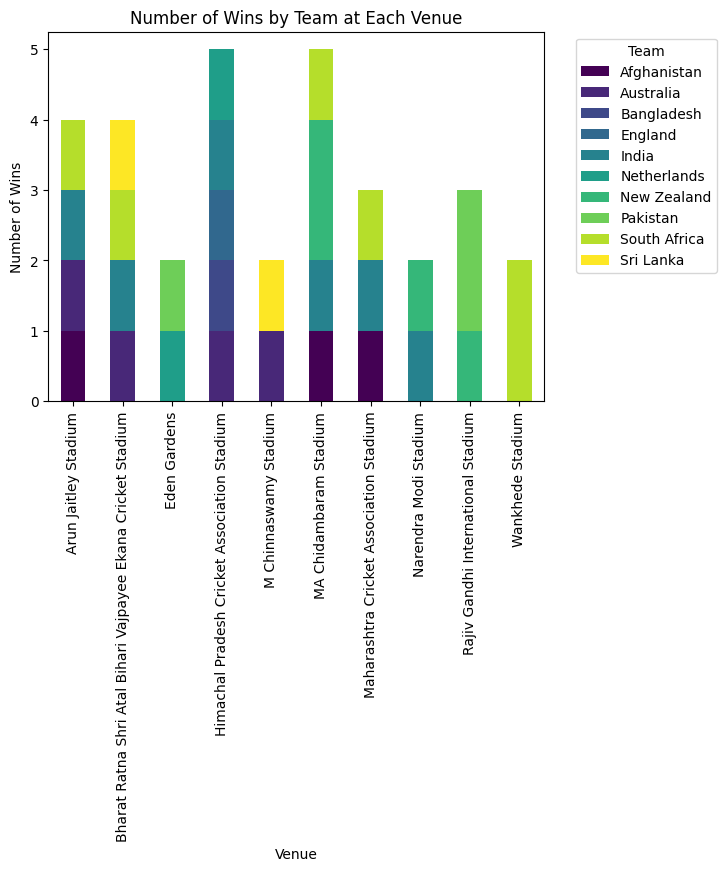

In [28]:
# Count the number of wins for each team at each venue
venue_team_wins = matches.groupby(['venue', 'winner'])['winner'].count().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
venue_team_wins.plot(kind='bar', stacked=True, colormap='viridis')
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Team at Each Venue')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


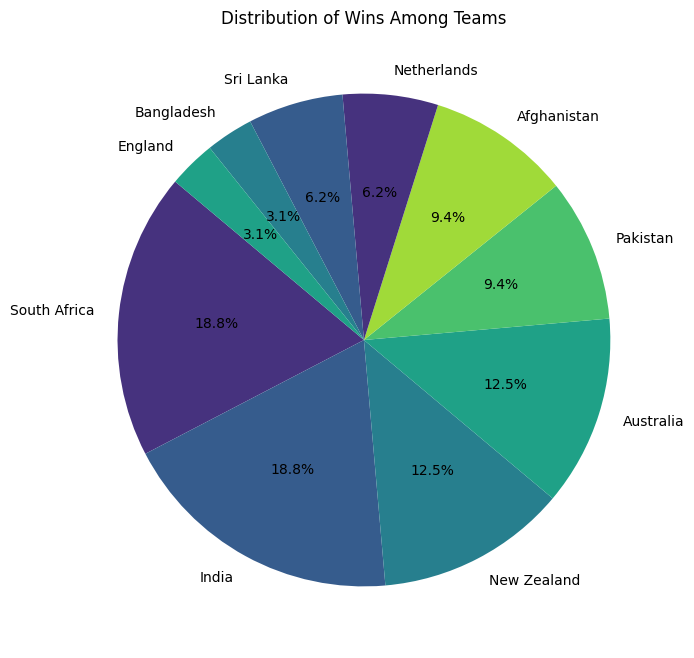

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of wins for each team
team_wins = matches['winner'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(team_wins, labels=team_wins.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Wins Among Teams')
plt.show()


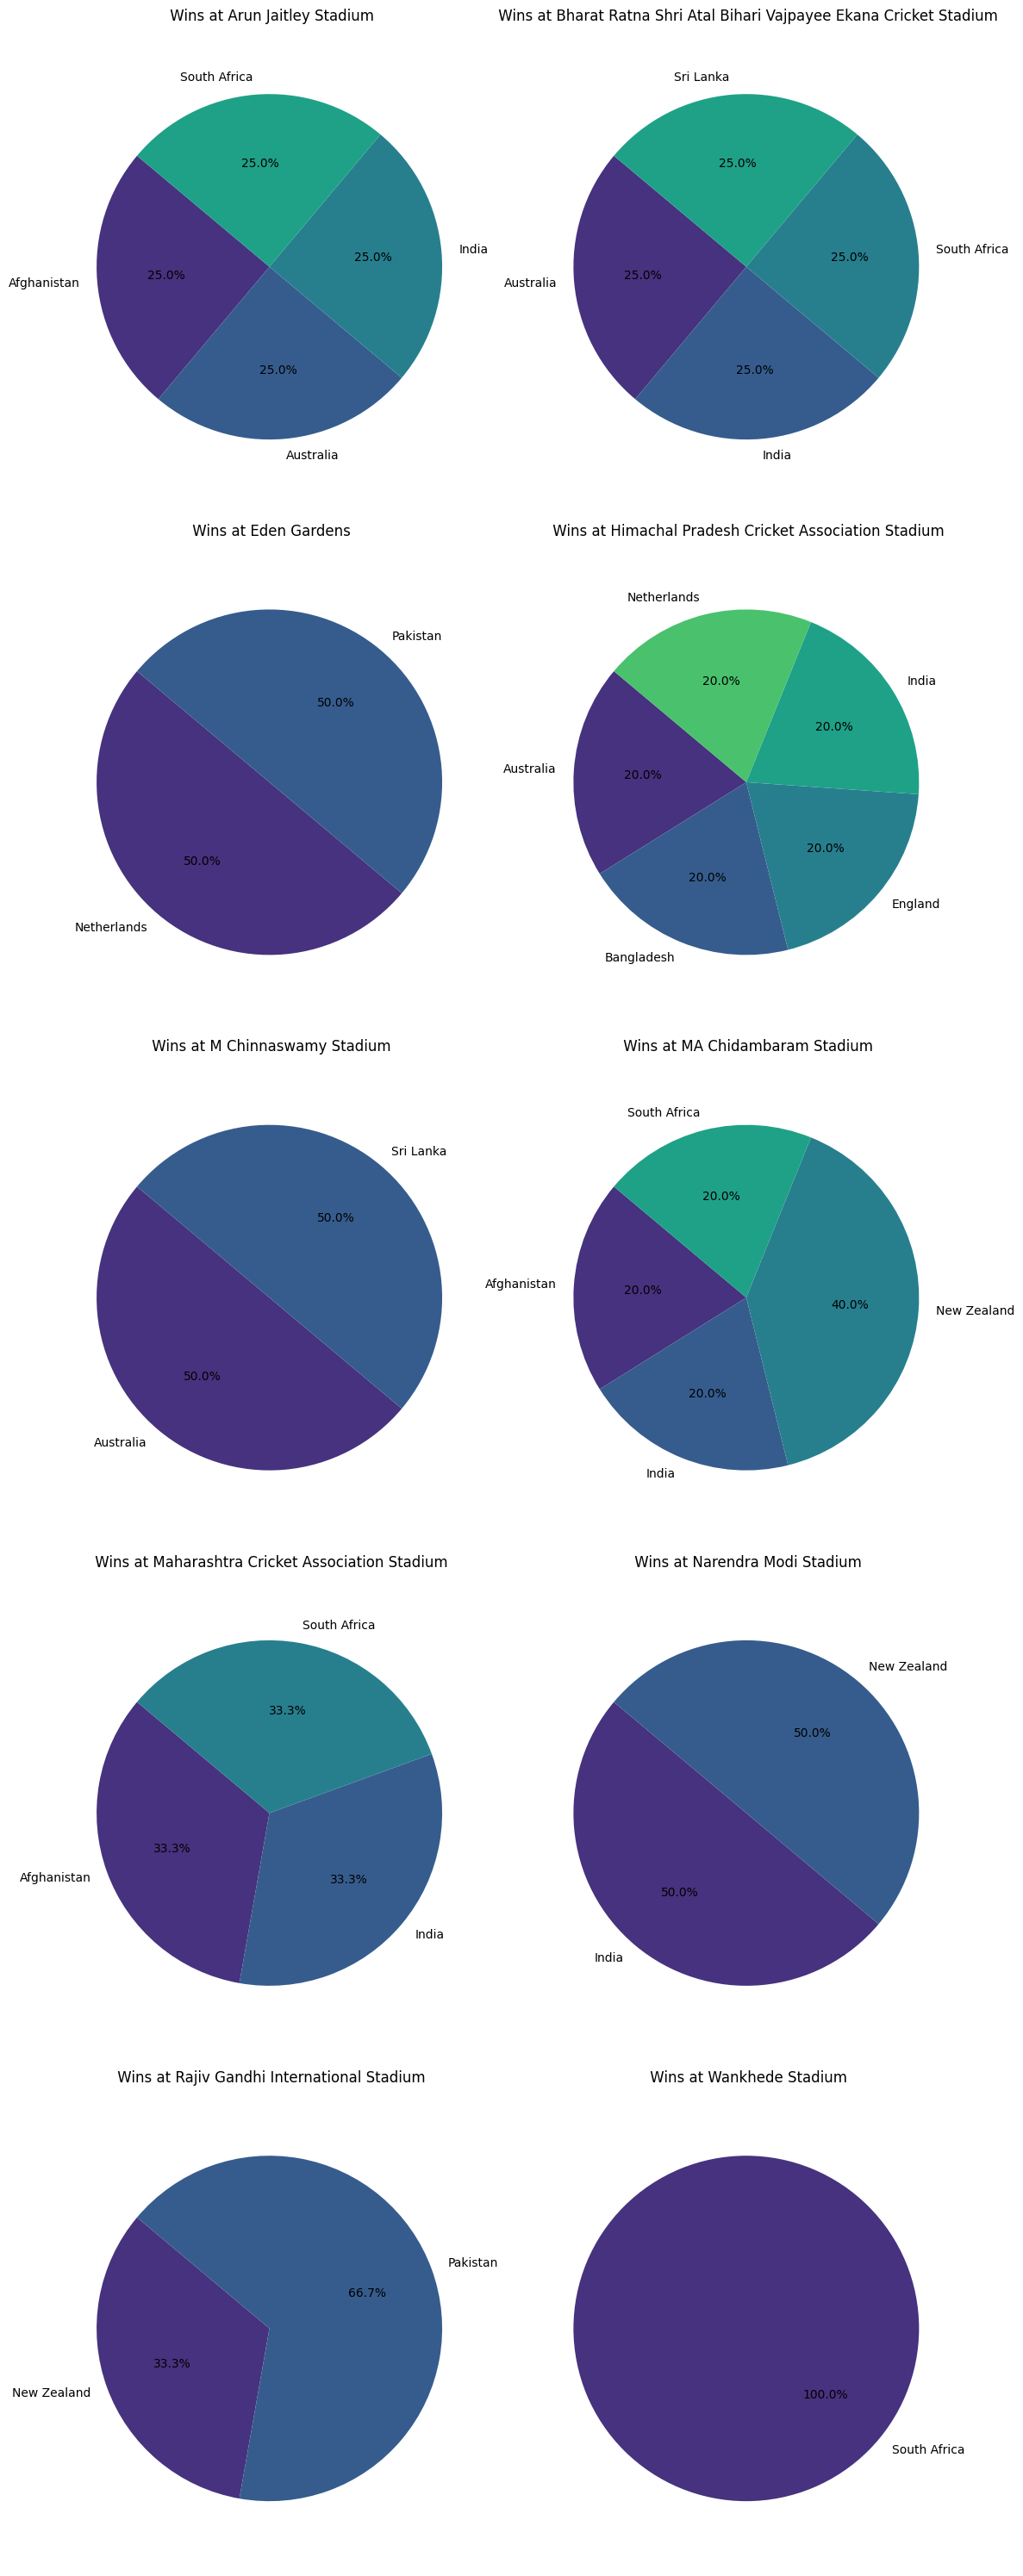

In [36]:
import math
venue_team_wins = matches.groupby(['venue', 'winner'])['winner'].count().unstack().fillna(0)

# Determine the subplot grid size dynamically
num_venues = len(venue_team_wins)
num_rows = math.ceil(num_venues / 2)
num_cols = min(2, num_venues)

# Plotting
plt.figure(figsize=(12, 6 * num_rows))
for index, venue in enumerate(venue_team_wins.index):
    plt.subplot(num_rows, num_cols, index + 1)

    # Filter out slices with 0.0%
    data = venue_team_wins.loc[venue]
    data = data[data > 0]

    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
    plt.title(f' Wins at {venue}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

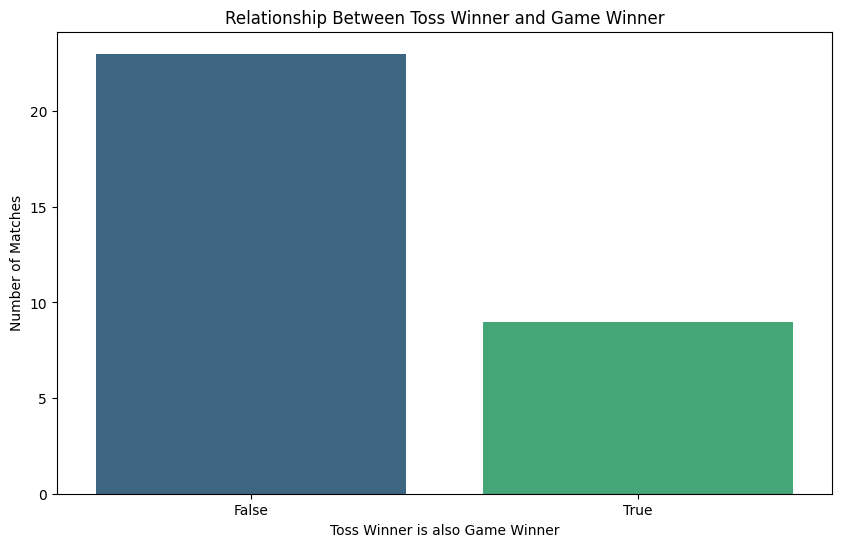

In [37]:
matches['toss_and_game_winner'] = (matches['toss_winner'] == matches['winner'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_and_game_winner', data=matches, palette='viridis')
plt.xlabel('Toss Winner is also Game Winner')
plt.ylabel('Number of Matches')
plt.title('Relationship Between Toss Winner and Game Winner')
plt.show()

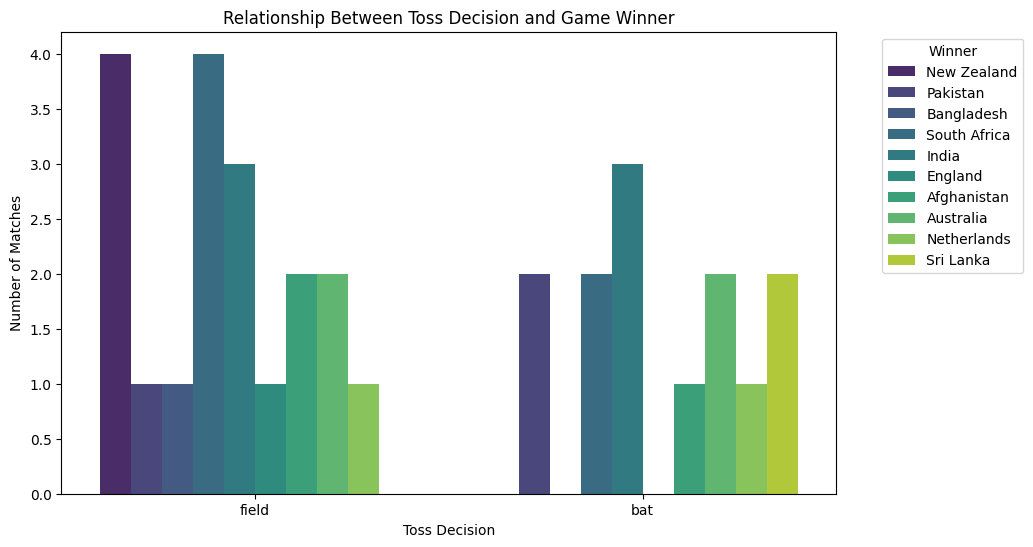

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', hue='winner', data=matches, palette='viridis')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.title('Relationship Between Toss Decision and Game Winner')
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

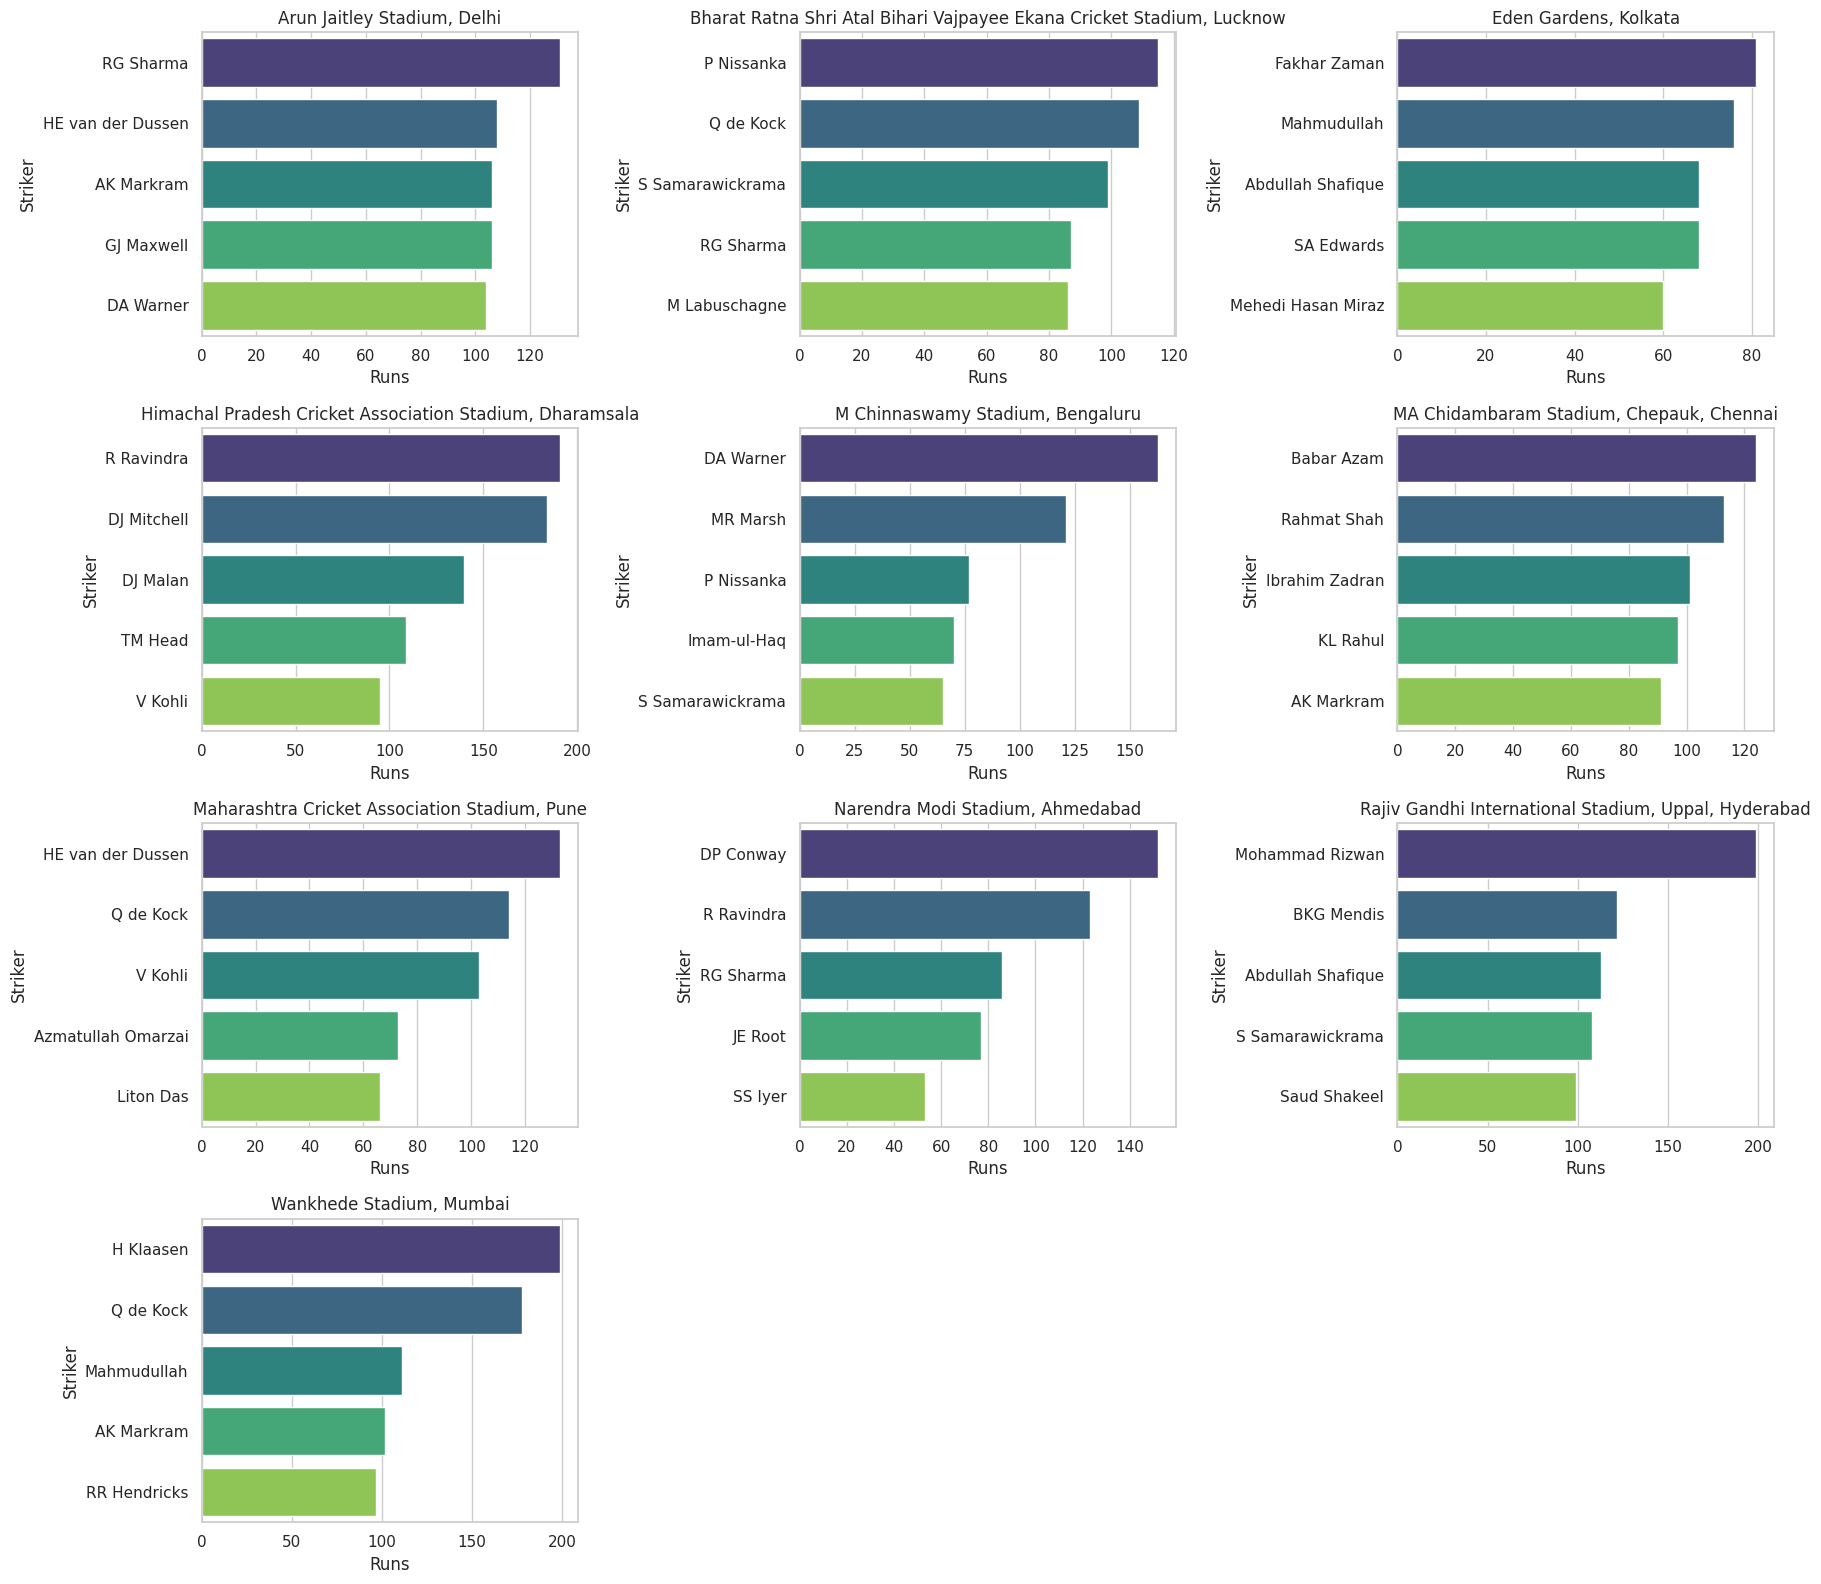

In [57]:
venue_wise_striker_runs = deliveries.groupby(['venue', 'striker'])['runs_off_bat'].sum().reset_index()
venue_wise_striker_runs_top5 = venue_wise_striker_runs.groupby('venue').apply(lambda x: x.nlargest(5, 'runs_off_bat')).reset_index(drop=True)
sns.set(style="whitegrid")

num_unique_venues = len(venue_wise_striker_runs_top5['venue'].unique())

num_rows = (num_unique_venues + 2) // 3

plt.figure(figsize=(18, 4 * num_rows))

for idx, venue in enumerate(venue_wise_striker_runs_top5['venue'].unique()):
    venue_data = venue_wise_striker_runs_top5[venue_wise_striker_runs_top5['venue'] == venue]
    plt.subplot(num_rows, 3, idx + 1)

    sns.barplot(x='runs_off_bat', y='striker', data=venue_data, palette='viridis')
    plt.title(venue)
    plt.xlabel('Runs')
    plt.ylabel('Striker')
    plt.tight_layout()

# Show the plot
plt.show()


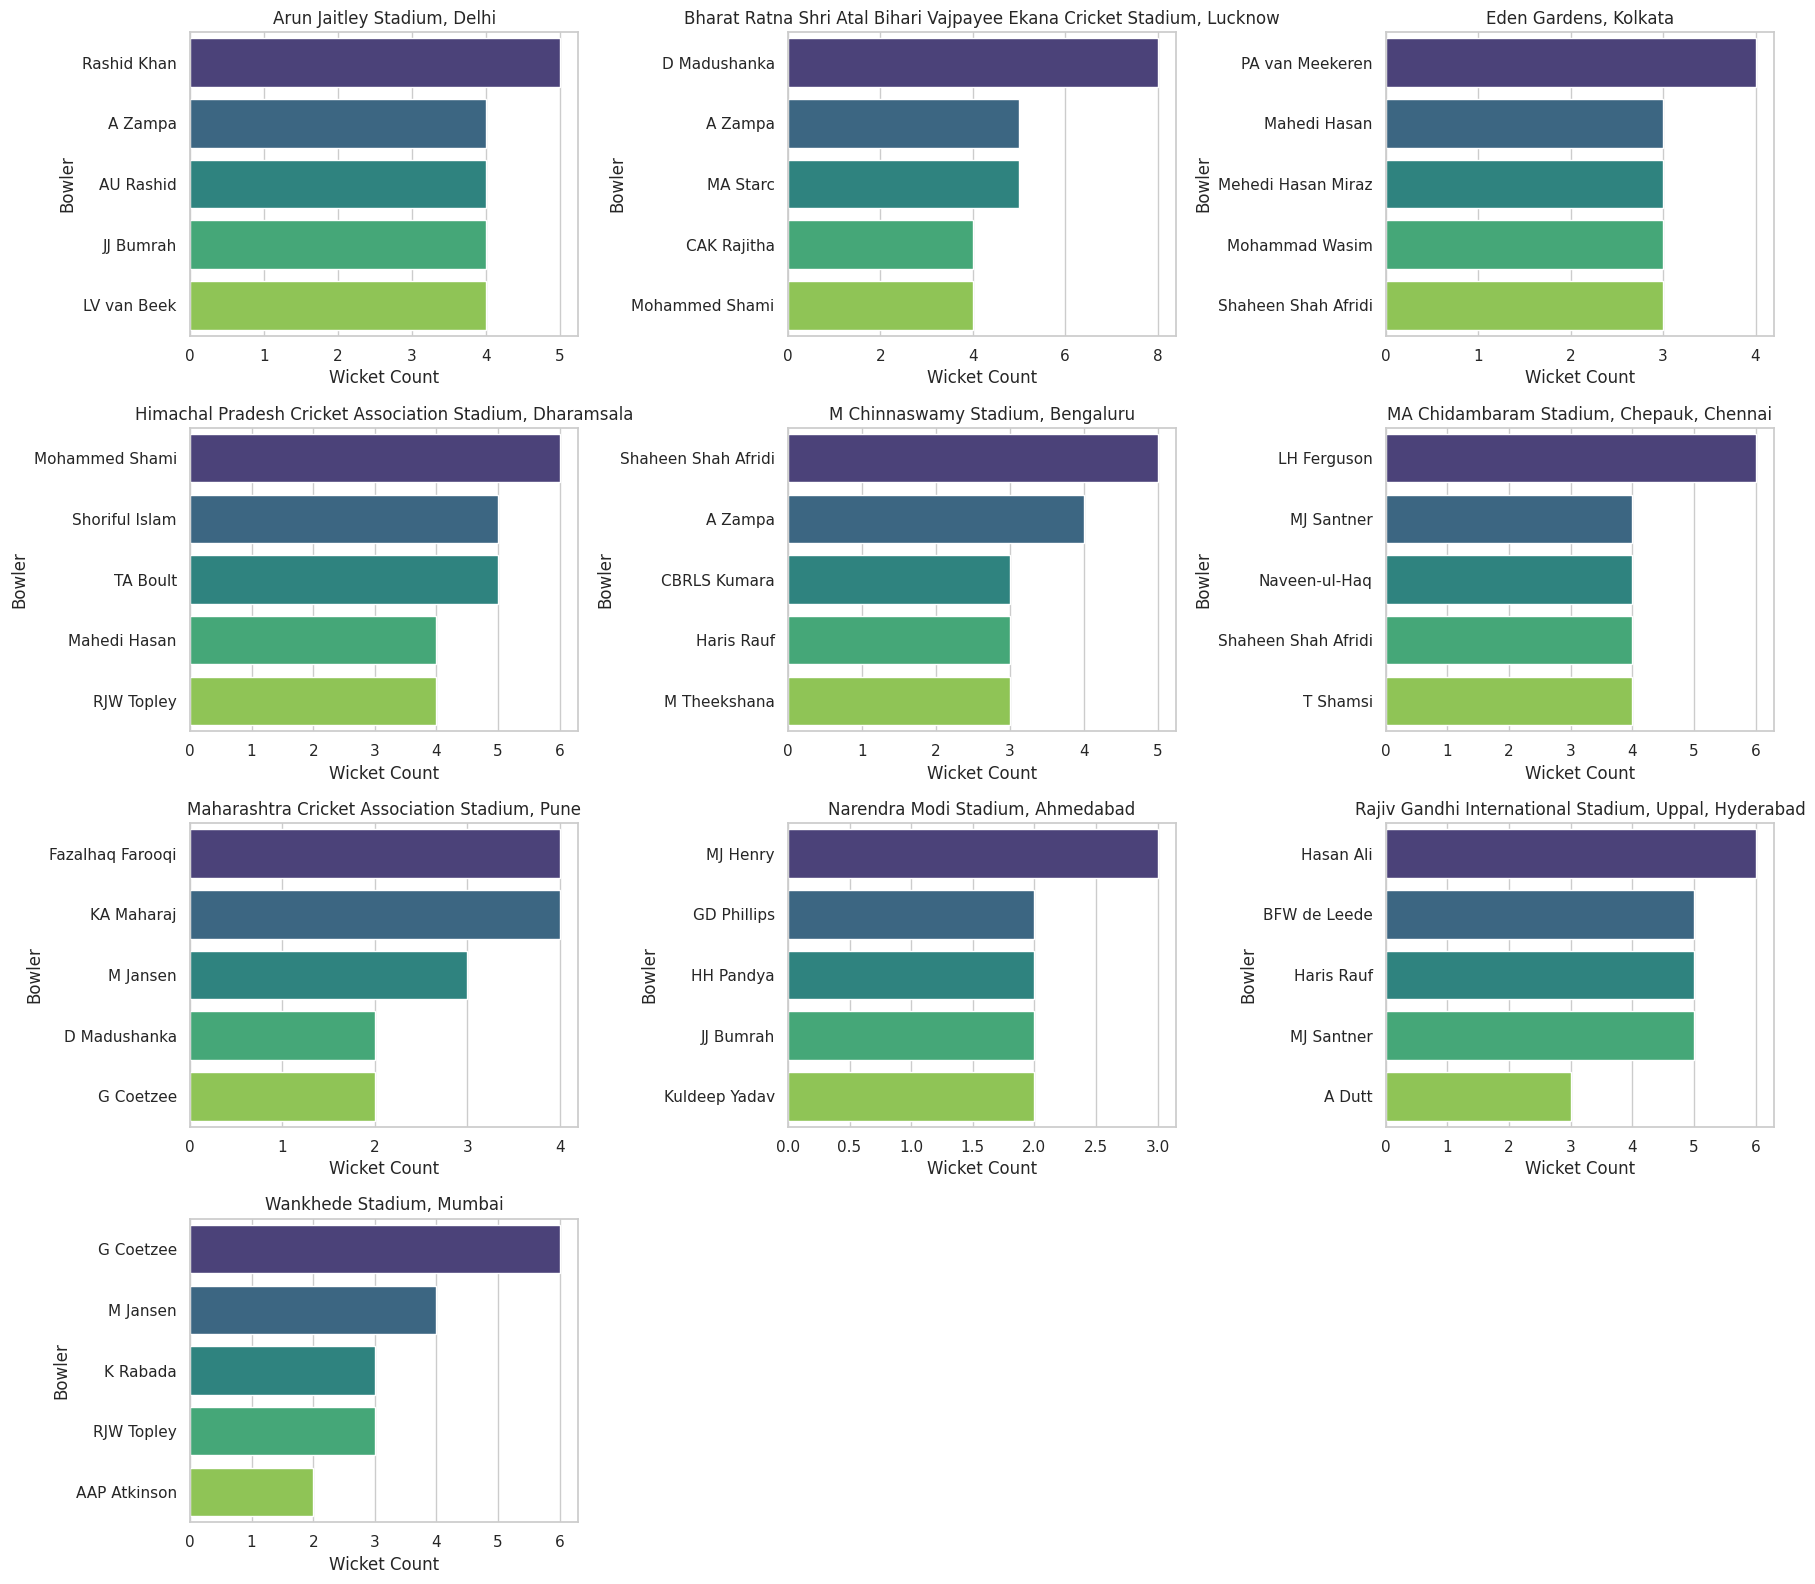

In [58]:
wickets = deliveries[deliveries['wicket_type'].notna()]
venue_wickets = wickets.groupby(['venue', 'bowler']).size().reset_index(name='wicket_count')
top5_bowlers=venue_wickets.groupby('venue').apply(lambda x: x.nlargest(5, 'wicket_count')).reset_index(drop=True)

sns.set(style="whitegrid")

num_unique_venues = len(top5_bowlers['venue'].unique())

num_rows = (num_unique_venues + 2) // 3

plt.figure(figsize=(18, 4 * num_rows))

for idx, venue in enumerate(top5_bowlers['venue'].unique()):
    venue_data = top5_bowlers[top5_bowlers['venue'] == venue]
    plt.subplot(num_rows, 3, idx + 1)

    sns.barplot(x='wicket_count', y='bowler', data=venue_data, palette='viridis')
    plt.title(venue)
    plt.xlabel('Wicket Count')
    plt.ylabel('Bowler')
    plt.tight_layout()

# Show the plot
plt.show()

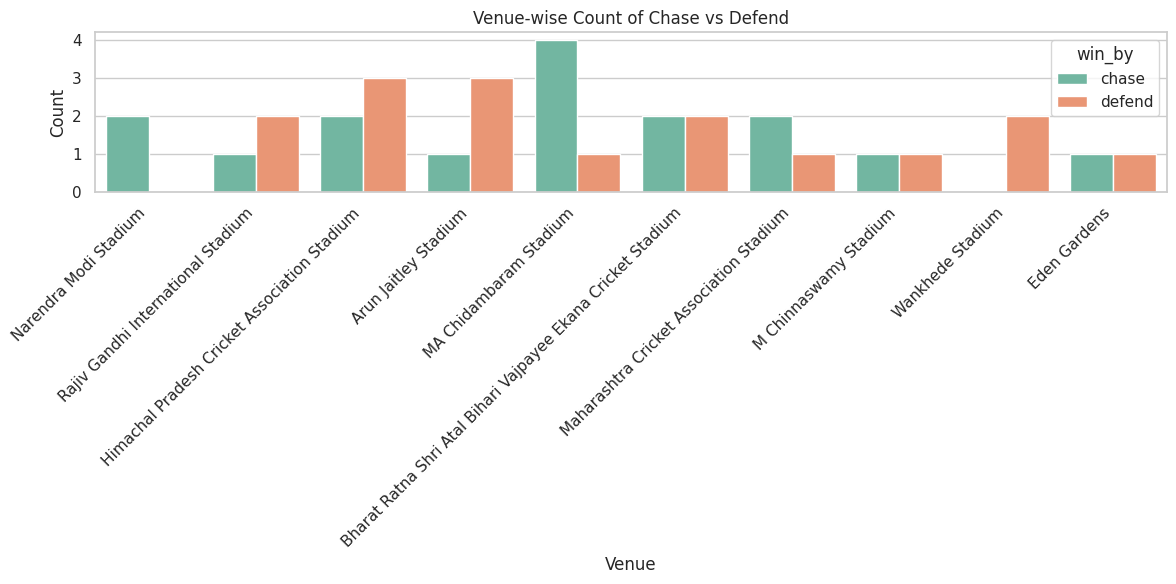

In [59]:
import numpy as np

venue_wise_wins = matches[['venue', 'winner_runs', 'winner_wickets']].copy()

venue_wise_wins['win_by'] = np.where(matches['winner_runs'].isna(), 'chase', 'defend')

venue_wise_wins.drop(['winner_runs', 'winner_wickets'], axis=1, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='venue', hue='win_by', data=venue_wise_wins, palette='Set2')
plt.title('Venue-wise Count of Chase vs Defend')
plt.xlabel('Venue')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


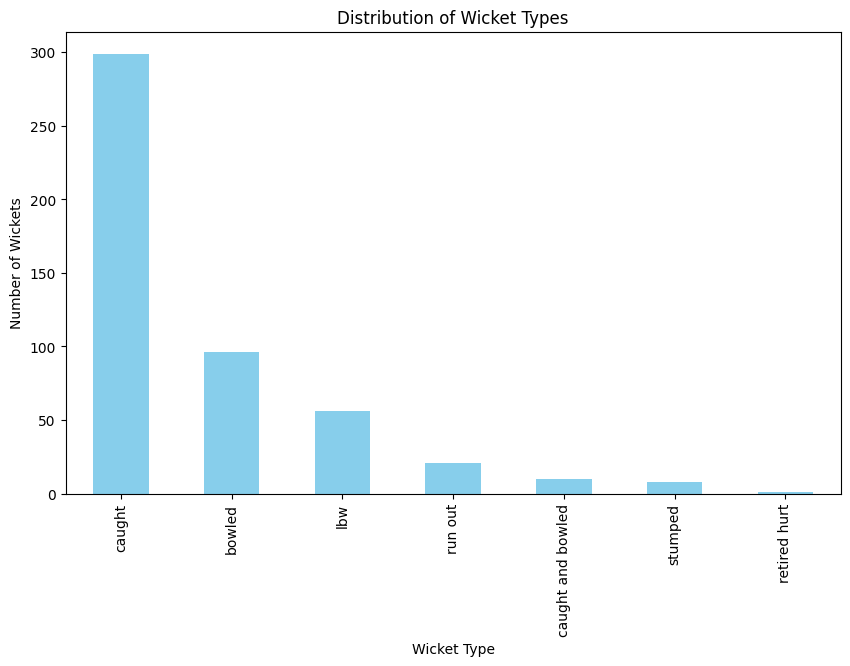

In [48]:
# Count the occurrences of each wicket type
wicket_counts = deliveries['wicket_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
wicket_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Wicket Type')
plt.ylabel('Number of Wickets')
plt.title('Distribution of Wicket Types')
plt.show()

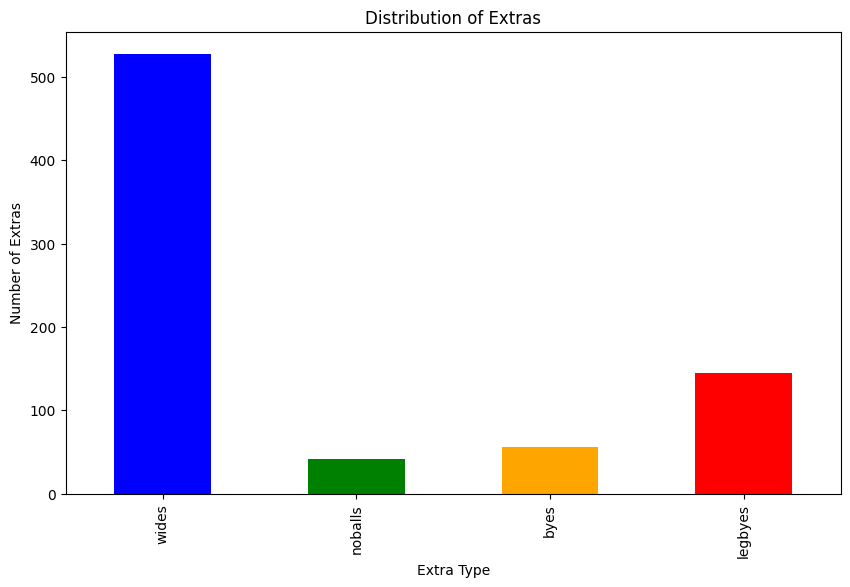

In [49]:
# Extract the relevant columns for extras
extras_columns = ['wides', 'noballs', 'byes', 'legbyes']
extras_data = deliveries[extras_columns]

# Calculate the total count of each type of extra
extras_counts = extras_data.sum()

# Plotting as a bar plot
plt.figure(figsize=(10, 6))
extras_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Extra Type')
plt.ylabel('Number of Extras')
plt.title('Distribution of Extras')
plt.show()

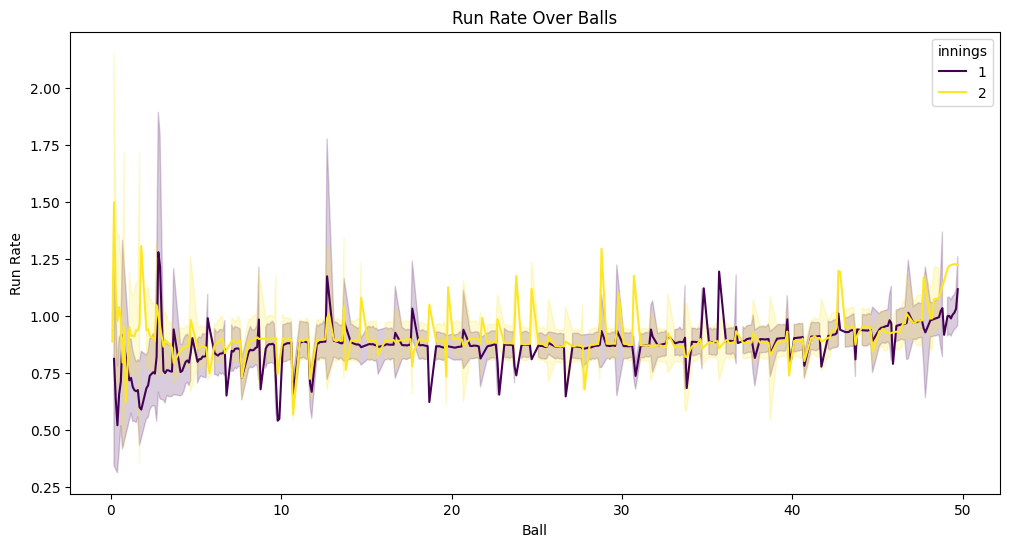

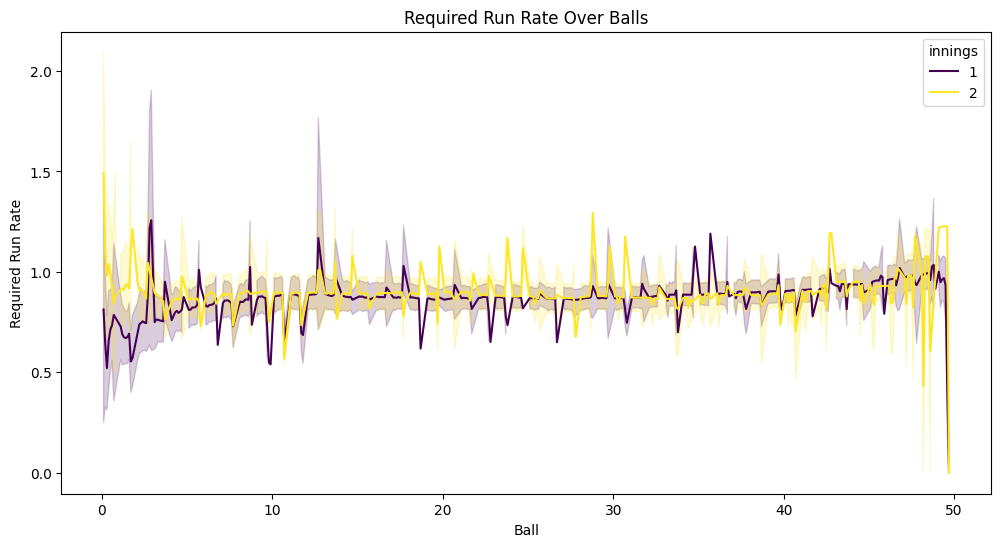

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate run rate, required run rate
deliveries['runs'] = deliveries['runs_off_bat'] + deliveries['extras']
deliveries['run_rate'] = deliveries.groupby(['match_id', 'innings'])['runs'].cumsum() / deliveries.groupby(['match_id', 'innings'])['ball'].cumcount()
deliveries['required_run_rate'] = deliveries.groupby(['match_id', 'innings'])['runs'].cumsum().shift(-1, fill_value=0) / (deliveries.groupby(['match_id', 'innings'])['ball'].cumcount() + 1)


# Plotting run rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='ball', y='run_rate', data=deliveries, hue='innings', palette='viridis')
plt.xlabel('Ball')
plt.ylabel('Run Rate')
plt.title('Run Rate Over Balls')
plt.show()

# Plotting required run rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='ball', y='required_run_rate', data=deliveries, hue='innings', palette='viridis')
plt.xlabel('Ball')
plt.ylabel('Required Run Rate')
plt.title('Required Run Rate Over Balls')
plt.show()


